In [71]:
import numpy as np                
import matplotlib.pyplot as plt   

In [72]:
class MyTuple:
    '''
    The basic object manipulated by an AD calculator
    Instances of this class is a tuple containining one 
    function/derivative evaluation.
    '''
    def __init__(self,**kwargs):
        # variables for the value (val) and derivative (der) of our input function 
        self.val = 0
        self.der = 1    
        
        # re-assign these default values 
        if 'val' in kwargs:
            self.val = kwargs['val']
        if 'der' in kwargs:
            self.der = kwargs['der']

In [73]:
def sin(a):
    val = np.sin(a.val)
    der = np.cos(a.val) * a.der
    return MyTuple(val=val, der=der)

In [74]:
def cos(a):
    val = np.cos(a.val)
    der = -np.sin(a.val) * a.der
    return MyTuple(val=val, der=der)

In [75]:
def tanh(a):
    val = np.tanh(a.val)
    der = (1 - np.tanh(a.val)**2) * a.der
    return MyTuple(val=val, der=der)

In [76]:
def checkTuple(a):
    if not isinstance(a, MyTuple):
        a = MyTuple(val=a, der=0)
    return a

In [77]:
def add(a, b):
    a = checkTuple(a)
    b = checkTuple(b)
    val = a.val + b.val
    der = a.der + b.der
    return MyTuple(val=val, der=der)

In [78]:
def mult(a, b):
    a = checkTuple(a)
    b = checkTuple(b)
    
    val = a.val * b.val
    der = a.val * b.der + b.val * a.der
    return  MyTuple(val=val, der=der)

In [79]:
def power(a, n):
    val = a.val**n
    der = n * (a.val)**(n-1) * a.der
    return  MyTuple(val=val, der=der)

In [80]:
def max(a, b):
    a = checkTuple(a)
    b = checkTuple(b)
            
    if a.val > b.val:
        val = a.val
        der = a.der
    else:
        val = b.val
        der = b.der
    return  MyTuple(val=val, der=der)

In [81]:
MyTuple.__add__ = add
MyTuple.__radd__ = add
MyTuple.__mul__ = mult
MyTuple.__rmul__ = mult
MyTuple.__pow__ = power

In [84]:
def plot_it(g):
    f, (ax1, ax2) = plt.subplots(1, 2,figsize = (13,3))
    s = np.linspace(-10,10,1000)
    

    func_vals = [g(MyTuple(val=i)) for i in s]

    g_vals = [t.val for t in  func_vals]      # container for storing function evaluations over the range of s
    dgdw_vals = [t.der for t in func_vals]   # container for storing derivative evaluations over the range of s
    
    # plot everything
    ax1.plot(s,g_vals,c = 'k')
    ax1.set_title('function')       # include title
    ax2.plot(s,dgdw_vals,c = 'r')
    ax2.set_title('derivative')     # include title
    plt.show()          # this shows figure inline

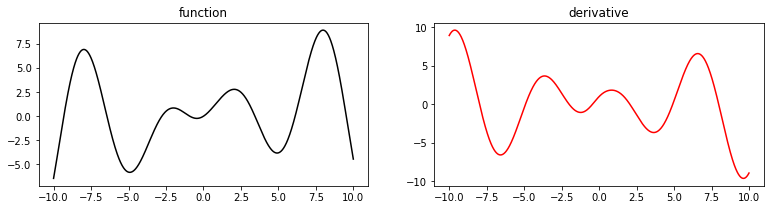

In [86]:
g = lambda w: sin(w) * w + tanh(w)
plot_it(g)

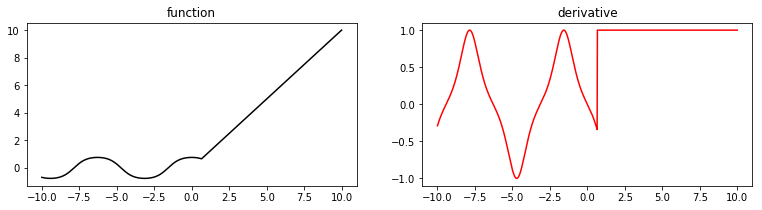

In [87]:
g = lambda w: max(w,tanh(cos(w)))
plot_it(g)

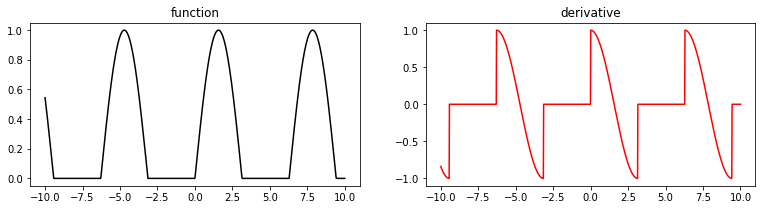

In [88]:
g = lambda w: max(0,sin(w))
plot_it(g)

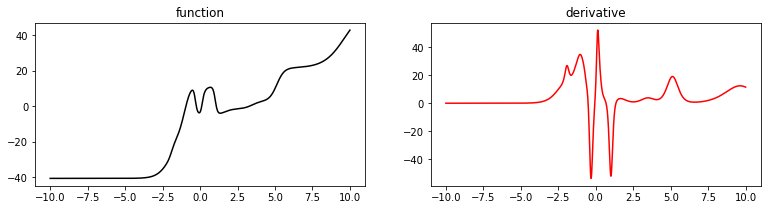

In [92]:
# define new function
N = 20
a = 5 * np.random.randn(N,3)
a_0 = 5 * np.random.randn(1,1)[0][0]

def g(w):
    c = a_0
    for i in range(N):
        c += a[i][0] * tanh(a[i][1] + a[i][2] * w)
    return c
        
# plot over a range of valuesw
plot_it(g)

In [95]:
c = (0,)

In [96]:
c

(0,)

In [97]:
c + 3

TypeError: can only concatenate tuple (not "int") to tuple

In [98]:
c.dtype

AttributeError: 'tuple' object has no attribute 'dtype'

In [100]:
type(c)

tuple